<a href="https://colab.research.google.com/github/shirishahsharon/IBM_HR_Data_Analysis/blob/main/ibm_hr_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../input/ibmhr-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv', index_col = 0)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,DailyRateGroups,HourlyRateGroups,MonthlyIncomeGroups,MonthlyRateGroups,TotalWorkingYearsGroups,YearsAtCompanyGroups,AgeGroups,YearsBeforeCompanyGroups
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,0,5,K - 1100 => 1200,I - 90 => 100,E - 5000 => 6000,S - 19000 => 20000,D - 6 => 10 Years,D - 6 => 10 Years,E - 41 => 50 Years,B - 2 => 3 Years
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,1,7,B - 200 => 300,F - 60 => 70,E - 5000 => 6000,X - 24000 => 25000,D - 6 => 10 Years,D - 6 => 10 Years,E - 41 => 50 Years,B - 2 => 3 Years
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,0,0,M - 1300 => 1400,I - 90 => 100,B - 2000 => 3000,B - 2000 => 3000,D - 6 => 10 Years,A - 0 => 1 Year,D - 31 => 40 Years,B - 2 => 3 Years
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,3,0,M - 1300 => 1400,E - 50 => 60,B - 2000 => 3000,W - 23000 => 24000,D - 6 => 10 Years,D - 6 => 10 Years,D - 31 => 40 Years,B - 2 => 3 Years
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,2,2,E - 500 => 600,C - 30 => 40,C - 3000 => 4000,P - 16000 => 17000,D - 6 => 10 Years,B - 2 => 3 Years,C - 26 => 30 Years,B - 2 => 3 Years


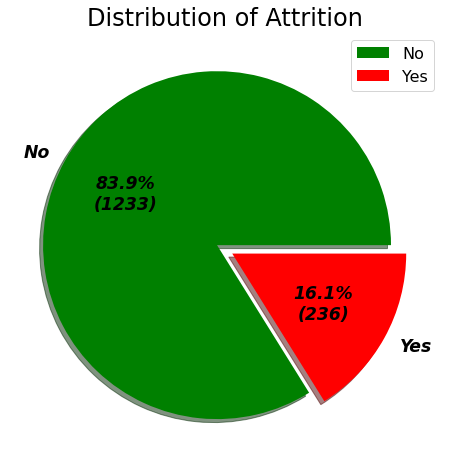

In [ ]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

attrition = df.Attrition.value_counts()
fig, ax = plt.subplots(figsize = (12, 8))
ax.pie(attrition.values, labels = attrition.index, explode=[0.05, 0.05], shadow = True, colors = ['green', 'red'],
       autopct = lambda pct: func(pct, attrition.values),
       textprops = {'family':'sans-serif', 'fontsize':'xx-large', 'fontstyle':'italic', 'fontweight':'heavy'})
plt.title('Distribution of Attrition', size = 24)
plt.legend(attrition.index, loc = 'upper right', prop={'size': 16})
plt.show()

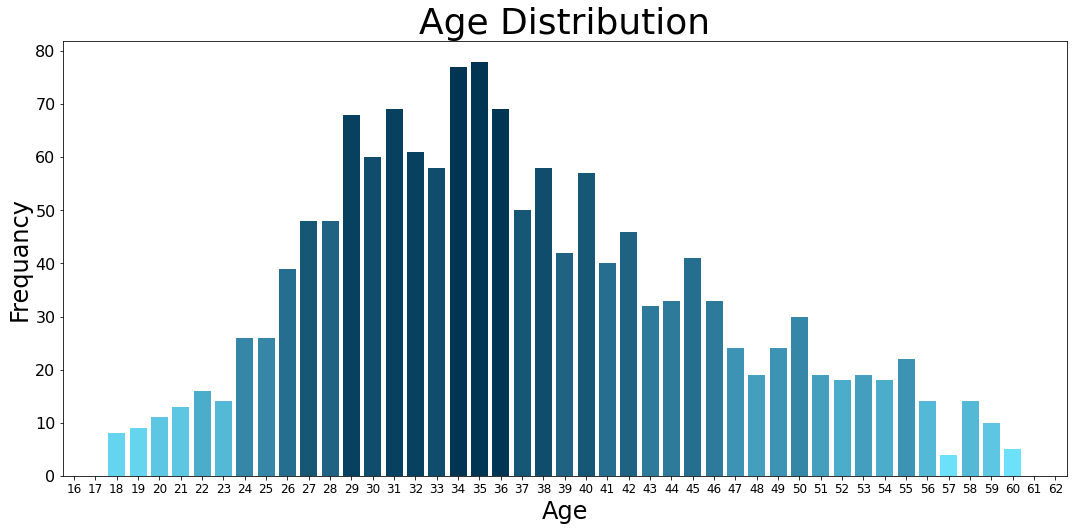

In [ ]:
age = df.Age.value_counts().sort_index()
fig, ax = plt.subplots(figsize = (18, 8))
ax.bar(age.index, age.values, color = ['#65d4ee', '#65d4ee', '#5cc6e3', '#5cc6e3', '#4caccb', '#54b9d7', '#3586a7', '#3586a7',
                                       '#266e8f', '#175776', '#1f6282', '#07415f', '#104c6b', '#07415f', '#07415f', '#104c6b',
                                       '#003653', '#003653', '#003653', '#175776', '#104c6b', '#1f6282', '#175776', '#266e8f',
                                       '#1f6282', '#2d7a9b', '#2d7a9b', '#266e8f', '#2d7a9b', '#3c93b3', '#449fbf', '#3c93b3',
                                       '#3586a7', '#449fbf', '#4caccb', '#449fbf', '#4caccb', '#3c93b3', '#54b9d7', '#6ee1fa',
                                       '#54b9d7', '#5cc6e3', '#6ee1fa'])
plt.title('Age Distribution', size = 36)
plt.xlabel('Age', size = 24)
plt.ylabel('Frequancy', size = 24)
plt.locator_params('x', nbins = 86)
plt.xticks(size = 12)
plt.yticks(size = 16)
plt.show()

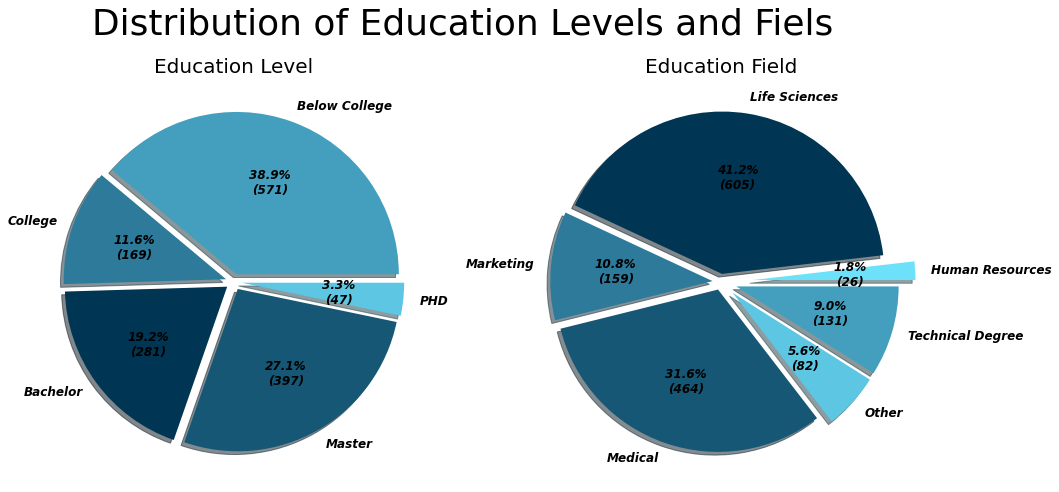

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle('Distribution of Education Levels and Fiels', size = 36)

education_level = df.Education.value_counts().sort_index()
axes[0].pie(education_level.values, labels = ['Below College', 'College', 'Bachelor', 'Master', 'PHD'],
            colors = ['#449fbf', '#2d7a9b', '#003653', '#175776', '#5cc6e3'],
            explode=[0.05, 0.05, 0.05, 0.05, 0.05], shadow = True, autopct = lambda pct: func(pct, education_level.values),
            textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[0].set_title('Education Level', fontsize = 20);


education_field = df.EducationField.value_counts().sort_index()
axes[1].pie(education_field.values, labels = ['Human Resources','Life Sciences','Marketing','Medical','Other','Technical Degree'],
            colors = ['#6ee1fa', '#003653', '#2d7a9b', '#175776', '#5cc6e3', '#449fbf'],
            explode=[0.2, 0.05, 0.05, 0.05, 0.1, 0.1], shadow = True, autopct = lambda pct: func(pct, education_field.values),
            textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[1].set_title('Education Field', fontsize = 20);

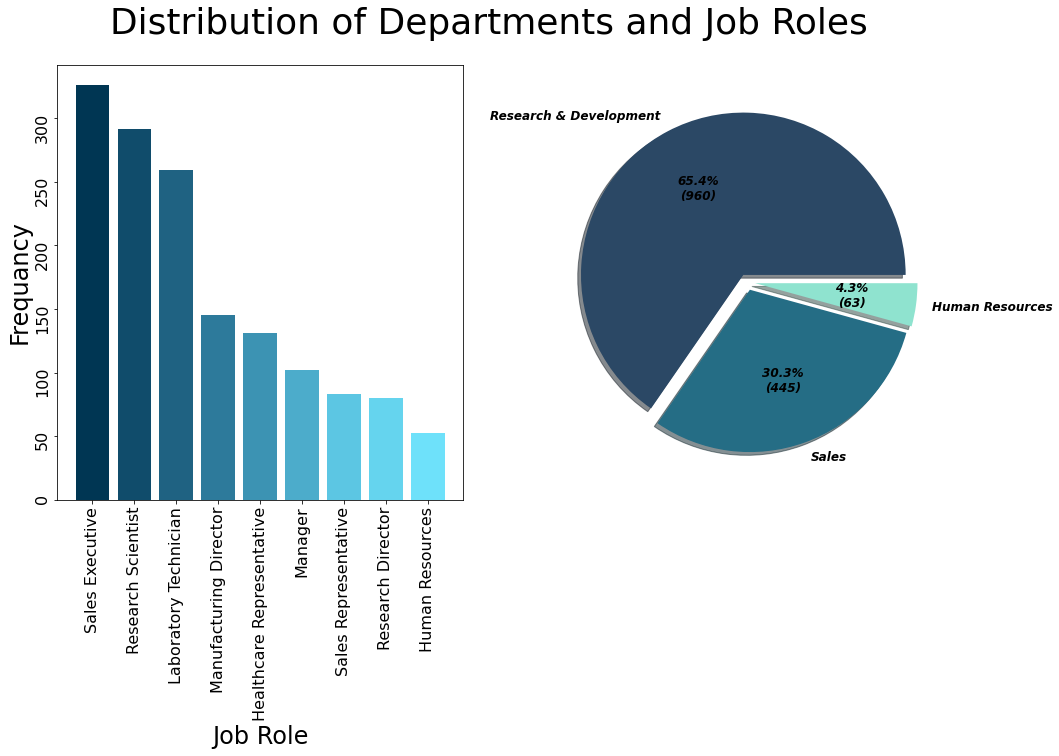

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle('Distribution of Departments and Job Roles', size = 36)

job_role = df.JobRole.value_counts().sort_values(ascending = False)
axes[0].bar(job_role.index, job_role.values,
            color = ['#003653', '#104c6b', '#1f6282', '#2d7a9b', '#3c93b3', '#4caccb', '#5cc6e3', '#65d4ee', '#6ee1fa'])
axes[0].set_xlabel('Job Role', size = 24)
axes[0].set_ylabel('Frequancy', size = 24)
axes[0].tick_params(labelrotation = 90, labelsize = 16)
axes[0].spines['bottom'].set_color('black')
axes[0].spines['left'].set_color('black')
axes[0].spines['top'].set_color('black')
axes[0].spines['right'].set_color('black')

department = df.Department.value_counts()
axes[1].pie(department.values, labels = department.index, explode=[0.05, 0.05, 0.05], shadow = True,
            colors = ['#2B4865', '#256D85', '#8FE3CF'], autopct = lambda pct: func(pct, department.values),
            textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});

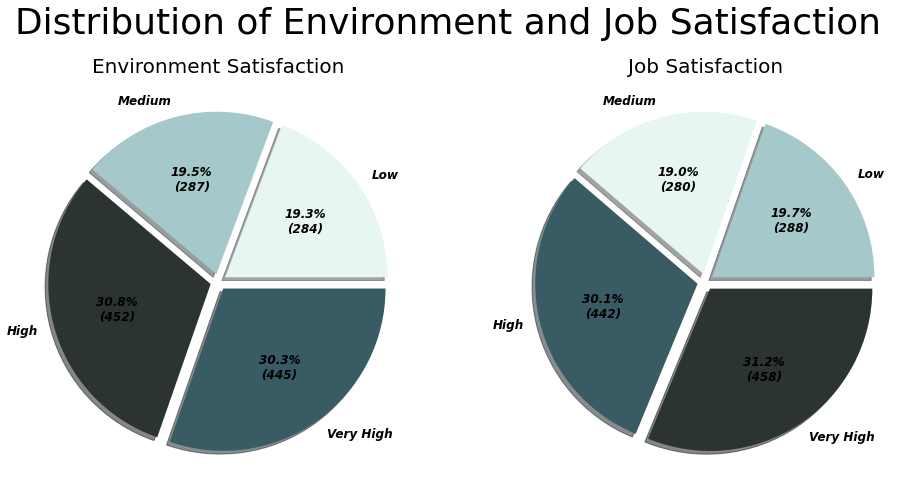

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle('Distribution of Environment and Job Satisfaction', size = 36)

env_satisfaction = df.EnvironmentSatisfaction.value_counts().sort_index()
axes[0].pie(env_satisfaction.values, labels = ['Low', 'Medium', 'High', 'Very High'],
            explode=[0.05, 0.05, 0.05, 0.05], shadow = True, colors = ['#E7F6F2', '#A5C9CA', '#2C3333', '#395B64'],
            autopct = lambda pct: func(pct, env_satisfaction.values),
            textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[0].set_title('Environment Satisfaction', fontsize = 20);

job_satisfaction = df.JobSatisfaction.value_counts().sort_index()
axes[1].pie(job_satisfaction.values, labels = ['Low', 'Medium', 'High', 'Very High'],
            explode=[0.05, 0.05, 0.05, 0.05], shadow = True, colors = ['#A5C9CA', '#E7F6F2', '#395B64', '#2C3333'],
            autopct = lambda pct: func(pct, job_satisfaction.values),
            textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[1].set_title('Job Satisfaction', fontsize = 20);

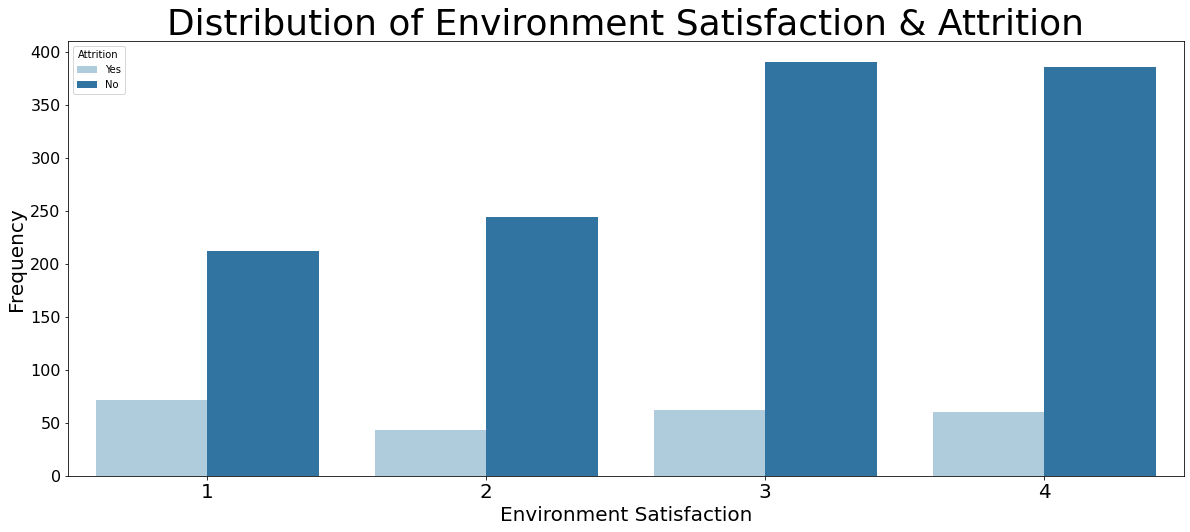

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(data = df, x = 'EnvironmentSatisfaction', hue = 'Attrition', palette = "Paired")
plt.title('Distribution of Environment Satisfaction & Attrition', size = 36)
plt.xlabel("Environment Satisfaction", size = 20)
plt.ylabel("Frequency", size = 20)
plt.xticks(size = 20);
plt.yticks(size = 16);

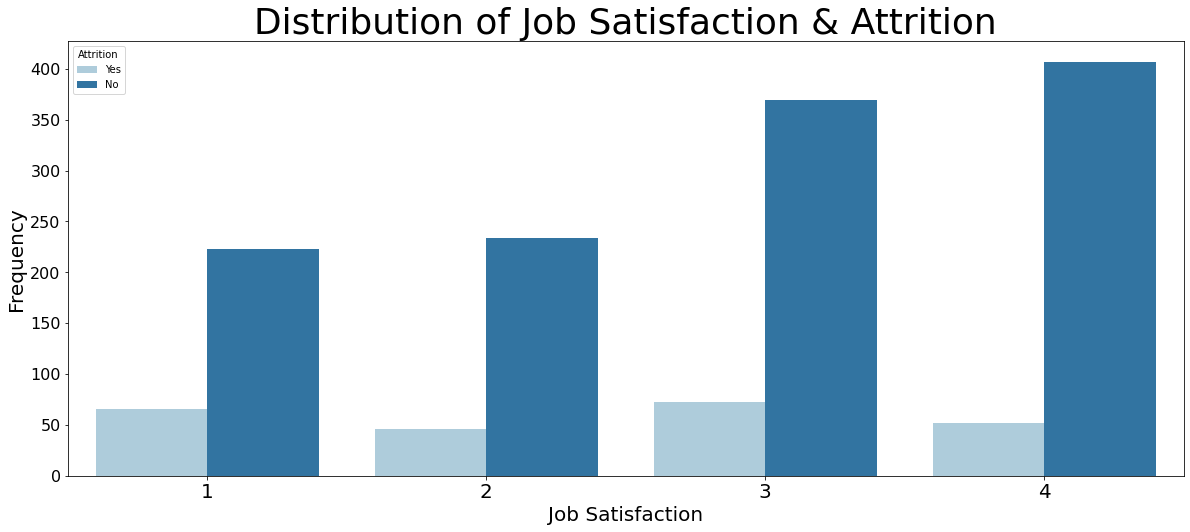

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(data = df, x = 'JobSatisfaction', hue = 'Attrition', palette = "Paired")
plt.title('Distribution of Job Satisfaction & Attrition', size = 36)
plt.xlabel("Job Satisfaction", size = 20)
plt.ylabel("Frequency", size = 20)
plt.xticks(size = 20);
plt.yticks(size = 16);

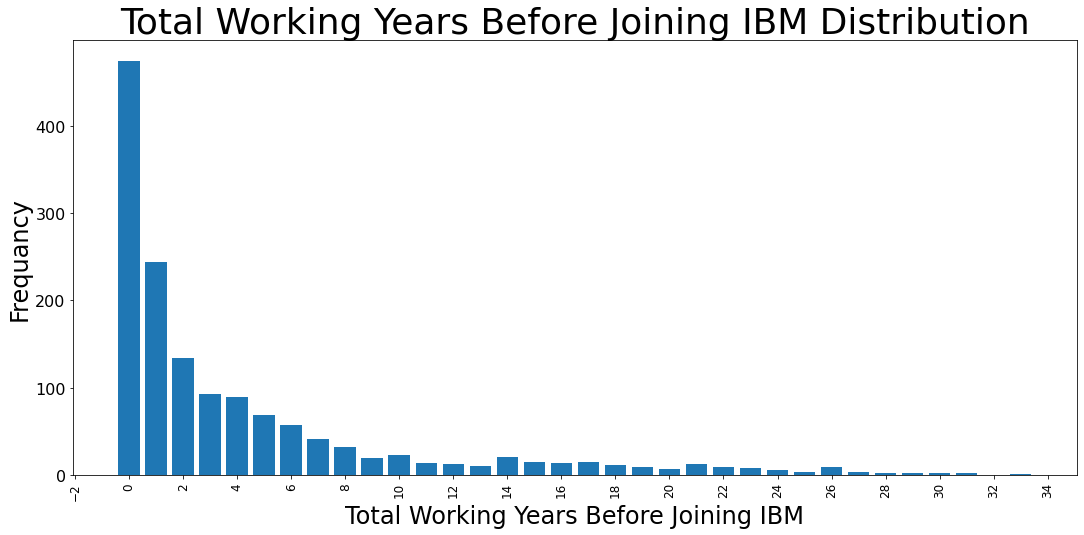

In [ ]:
years_before_company = df['YearsBeforeCompany'].value_counts().sort_index()
fig, ax = plt.subplots(figsize = (18, 8))
ax.bar(years_before_company.index, years_before_company.values,)
plt.title('Total Working Years Before Joining IBM Distribution', size = 36)
plt.xlabel('Total Working Years Before Joining IBM', size = 24)
plt.ylabel('Frequancy', size = 24)
plt.locator_params('x', nbins = 33)
plt.xticks(rotation = 90, size = 12)
plt.yticks(size = 16)
plt.show()

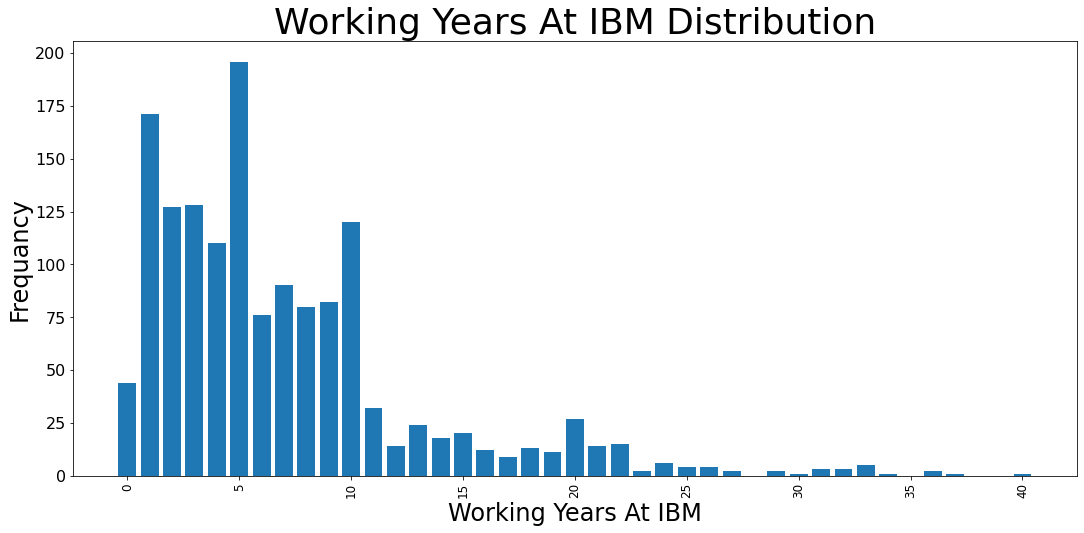

In [ ]:
years_at_company = df['YearsAtCompany'].value_counts().sort_index()
fig, ax = plt.subplots(figsize = (18, 8))
ax.bar(years_at_company.index, years_at_company.values)
plt.title('Working Years At IBM Distribution', size = 36)
plt.xlabel('Working Years At IBM', size = 24)
plt.ylabel('Frequancy', size = 24)
plt.locator_params('x', nbins = 16)
plt.xticks(rotation = 90, size = 12)
plt.yticks(size = 16)
plt.show()

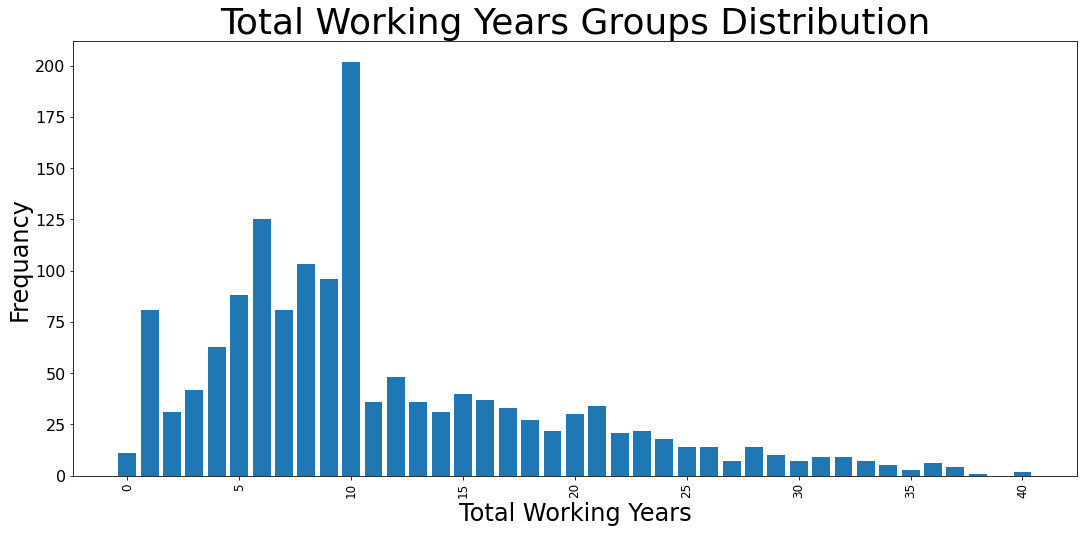

In [ ]:
total_working_years = df['TotalWorkingYears'].value_counts().sort_index()
fig, ax = plt.subplots(figsize = (18, 8))
ax.bar(total_working_years.index, total_working_years.values)
plt.title('Total Working Years Groups Distribution', size = 36)
plt.xlabel('Total Working Years', size = 24)
plt.ylabel('Frequancy', size = 24)
plt.locator_params('x', nbins = 16)
plt.xticks(rotation = 90, size = 12)
plt.yticks(size = 16)
plt.show()

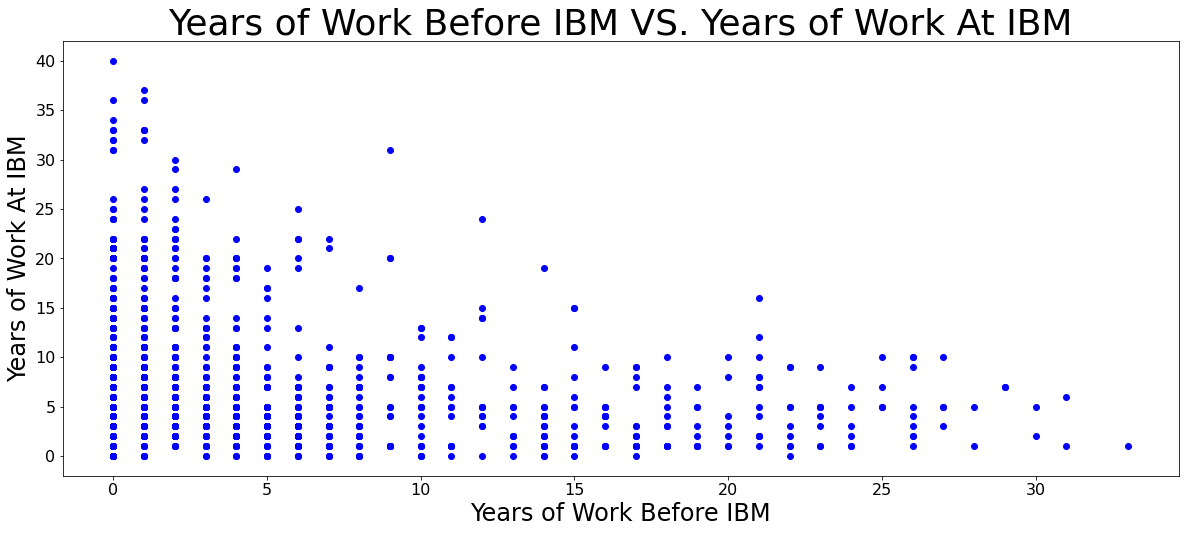

In [ ]:
plt.figure(figsize = (20,8))
plt.scatter(df.YearsBeforeCompany, df.YearsAtCompany, color = "blue")
plt.title('Years of Work Before IBM VS. Years of Work At IBM', size = 36)
plt.xlabel("Years of Work Before IBM", size = 24)
plt.ylabel("Years of Work At IBM", size = 24)
plt.xticks(size = 16);
plt.yticks(size = 16);
plt.show()

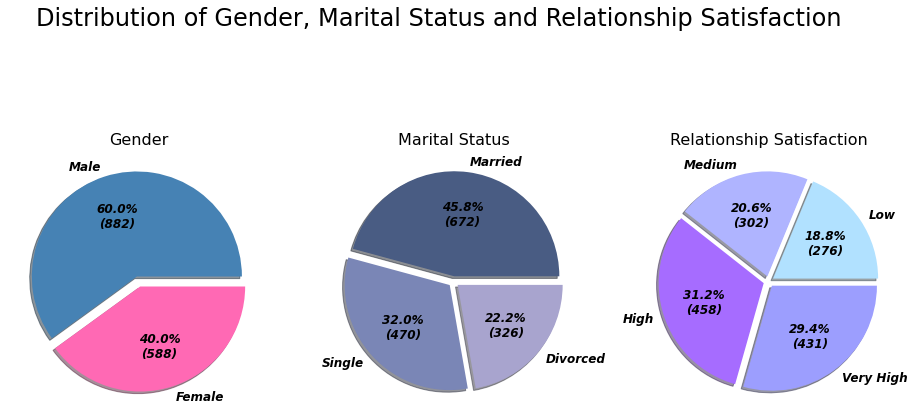

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16,8))
fig.suptitle('Distribution of Gender, Marital Status and Relationship Satisfaction', size = 24)

gender = df.Gender.value_counts()
axes[0].pie(gender.values, labels = gender.index, explode=[0.05, 0.05], shadow = True, colors = ['steelblue', 'hotpink'],
            autopct = lambda pct: func(pct, gender.values),
            textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[0].set_title('Gender', fontsize = 16);

marital_status = df.MaritalStatus.value_counts()
axes[1].pie(marital_status.values, labels = marital_status.index, explode=[0.05, 0.05, 0.05], shadow = True,
            colors = ['#495C83', '#7A86B6', '#A8A4CE'], autopct = lambda pct: func(pct, marital_status.values),
            textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[1].set_title('Marital Status', fontsize = 16);

relationship_satisfaction = df.RelationshipSatisfaction.value_counts().sort_index()
axes[2].pie(relationship_satisfaction.values, labels = ['Low', 'Medium', 'High', 'Very High'], explode=[0.05, 0.05, 0.05, 0.05],
            shadow = True, colors = ['#B1E1FF', '#AFB4FF', '#A66CFF', '#9C9EFE'],
            autopct = lambda pct: func(pct, relationship_satisfaction.values),
            textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'});
axes[2].set_title('Relationship Satisfaction', fontsize = 16);

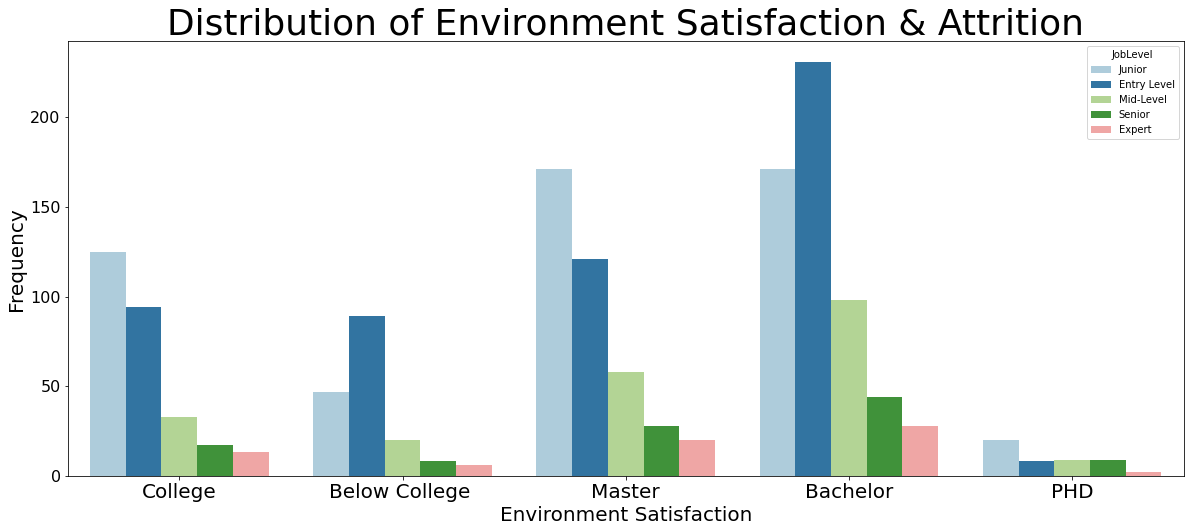

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(data = df, x = 'Education', hue = 'JobLevel', palette = "Paired")
plt.title('Distribution of Environment Satisfaction & Attrition', size = 36)
plt.xlabel("Environment Satisfaction", size = 20)
plt.ylabel("Frequency", size = 20)
plt.xticks(size = 20);
plt.yticks(size = 16);

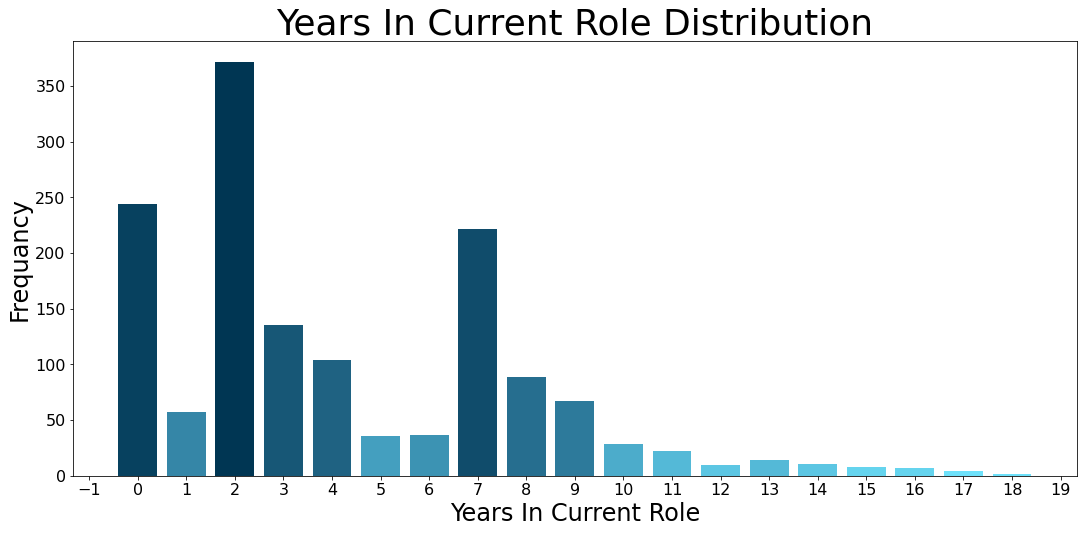

In [ ]:
cust_color = ['#07415f', '#3586a7', '#003653', '#175776', '#1f6282', '#449fbf', '#3c93b3', '#104c6b', '#266e8f', '#2d7a9b',
              '#4caccb', '#54b9d7', '#5cc6e3', '#54b9d7', '#5cc6e3', '#65d4ee', '#65d4ee', '#6ee1fa', '#6ee1fa']
years_in_current_role = df.YearsInCurrentRole.value_counts().sort_index()
fig, ax = plt.subplots(figsize = (18, 8))
ax.bar(years_in_current_role.index, years_in_current_role.values, color = cust_color)
plt.title('Years In Current Role Distribution', size = 36)
plt.xlabel('Years In Current Role', size = 24)
plt.ylabel('Frequancy', size = 24)
plt.locator_params('x', nbins = 38)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

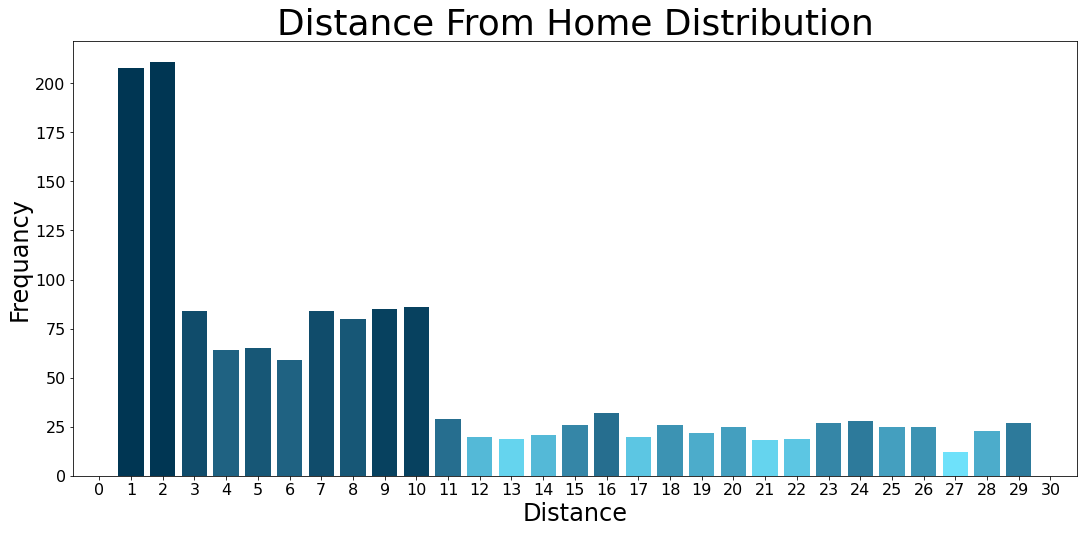

In [ ]:
cust_color = ['#003653', '#003653', '#104c6b', '#1f6282', '#175776', '#1f6282', '#104c6b', '#175776', '#07415f', '#07415f',
'#266e8f', '#54b9d7', '#65d4ee', '#54b9d7', '#3586a7', '#266e8f', '#5cc6e3', '#3c93b3', '#4caccb', '#449fbf', '#65d4ee',
'#5cc6e3', '#3586a7', '#2d7a9b', '#449fbf', '#3c93b3', '#6ee1fa', '#4caccb', '#2d7a9b',]
distance_from_home = df.DistanceFromHome.value_counts().sort_index()
fig, ax = plt.subplots(figsize = (18, 8))
ax.bar(distance_from_home.index, distance_from_home.values, color = cust_color)
plt.title('Distance From Home Distribution', size = 36)
plt.xlabel('Distance', size = 24)
plt.ylabel('Frequancy', size = 24)
plt.locator_params('x', nbins = 58)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

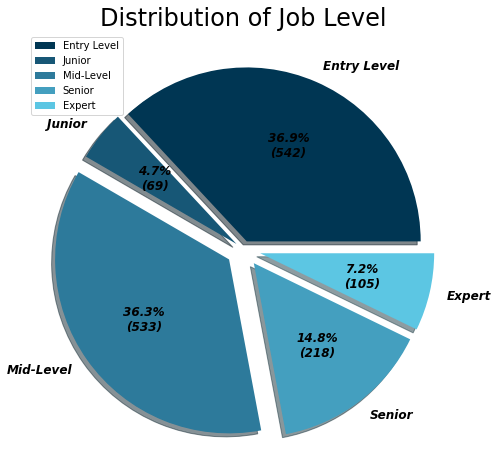

In [ ]:
job_level = df.JobLevel.value_counts().sort_index()
fig, ax = plt.subplots(figsize = (12, 8))
ax.pie(job_level.values, labels = ['Entry Level', 'Junior', 'Mid-Level', 'Senior', 'Expert'],
       colors = ['#003653', '#175776', '#2d7a9b', '#449fbf', '#5cc6e3'],
       explode=[0.05, 0.05, 0.1, 0.1, 0.1], shadow = True, autopct = lambda pct: func(pct, job_level.values),
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'})
plt.title('Distribution of Job Level', size = 24)
plt.legend(['Entry Level', 'Junior', 'Mid-Level', 'Senior', 'Expert'])
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  if __name__ == "__main__":


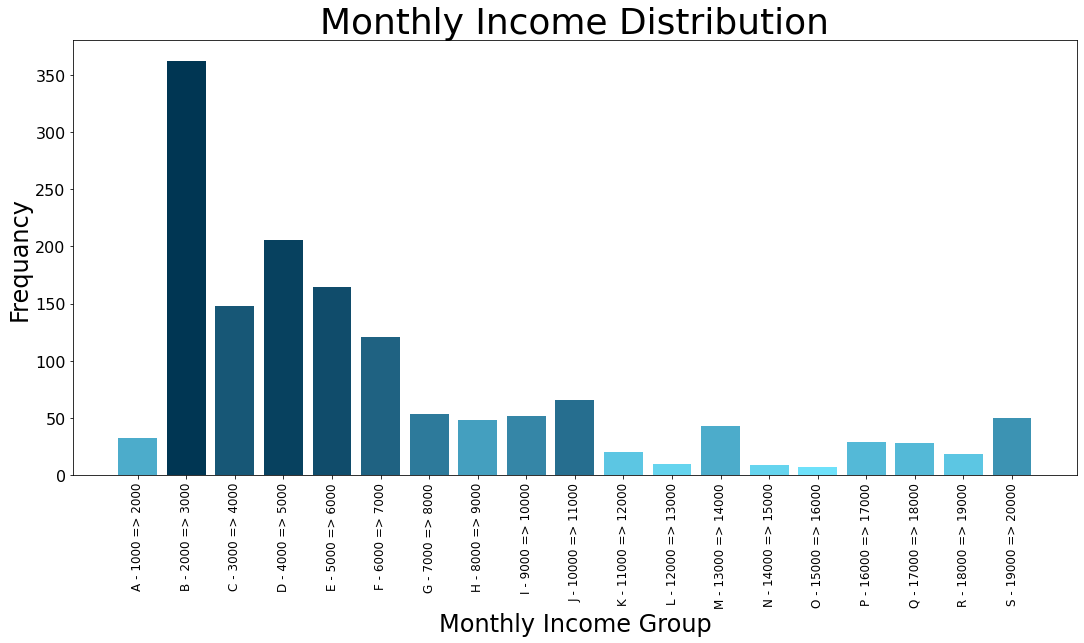

In [ ]:
cust_color = ['#4caccb', '#003653', '#175776', '#07415f', '#104c6b', '#1f6282', '#2d7a9b', '#449fbf', '#3586a7', '#266e8f',
              '#5cc6e3', '#65d4ee', '#4caccb', '#65d4ee', '#6ee1fa', '#54b9d7', '#54b9d7', '#5cc6e3', '#3c93b3']
monthly_income_groups = df['MonthlyIncomeGroups'].value_counts().sort_index()
fig, ax = plt.subplots(figsize = (18, 8))
ax.bar(monthly_income_groups.index, monthly_income_groups.values, color = cust_color)
plt.title('Monthly Income Distribution', size = 36)
plt.xlabel('Monthly Income Group', size = 24)
plt.ylabel('Frequancy', size = 24)
plt.locator_params('x', nbins = 16)
plt.xticks(rotation = 90, size = 12)
plt.yticks(size = 16)
plt.show()

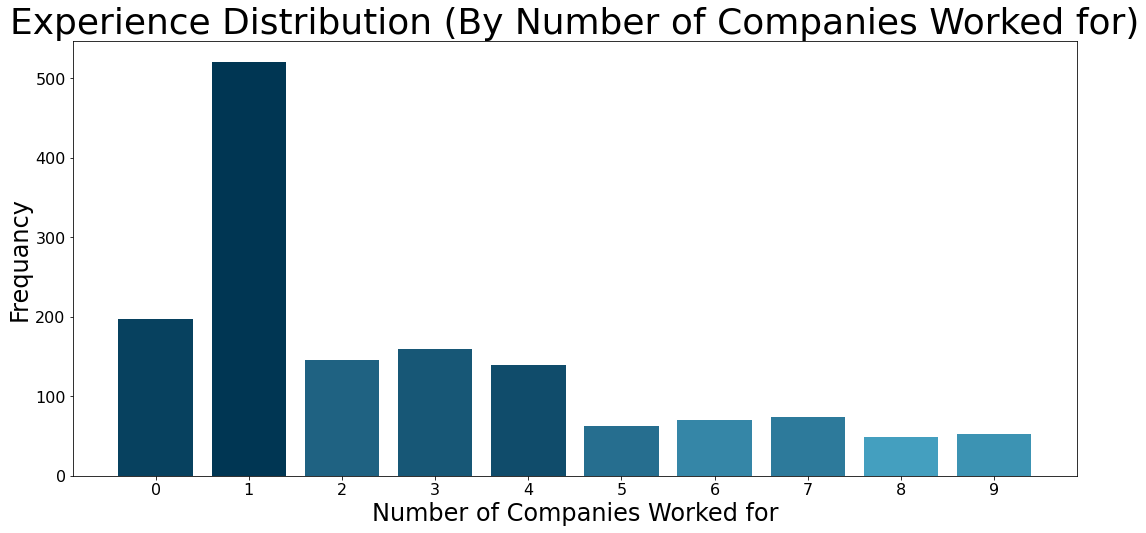

In [ ]:
cust_color = ['#07415f', '#003653', '#1f6282', '#175776', '#104c6b', '#266e8f', '#3586a7', '#2d7a9b', '#449fbf', '#3c93b3']
experience_by_number_of_companies = df.NumCompaniesWorked.value_counts().sort_index()
fig, ax = plt.subplots(figsize = (18, 8))
ax.bar(experience_by_number_of_companies.index, experience_by_number_of_companies.values, color = cust_color)
plt.title('Experience Distribution (By Number of Companies Worked for)', size = 36)
plt.xlabel('Number of Companies Worked for', size = 24)
plt.ylabel('Frequancy', size = 24)
plt.locator_params('x', nbins = 20)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

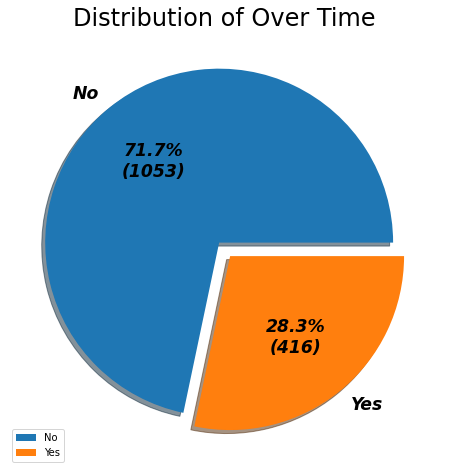

In [ ]:
over_time = df.OverTime.value_counts()
fig, ax = plt.subplots(figsize = (12, 8))
ax.pie(over_time.values, labels = over_time.index, explode=[0.05, 0.05], shadow = True,
       autopct = lambda pct: func(pct, over_time.values),
       textprops = {'family':'sans-serif', 'fontsize':'xx-large', 'fontstyle':'italic', 'fontweight':'heavy'})
plt.title('Distribution of Over Time', size = 24)
plt.legend(over_time.index)
plt.show()

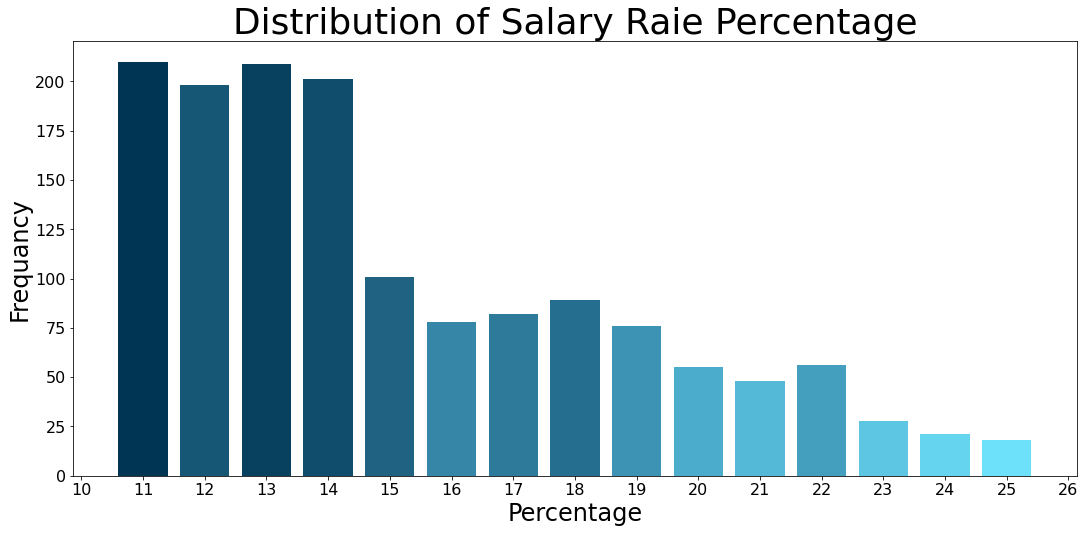

In [ ]:
cust_color = ['#003653', '#175776', '#07415f', '#104c6b', '#1f6282', '#3586a7', '#2d7a9b', '#266e8f', '#3c93b3', '#4caccb',
              '#54b9d7', '#449fbf', '#5cc6e3', '#65d4ee', '#6ee1fa',]
salary_raise = df.PercentSalaryHike.value_counts().sort_index()
fig, ax = plt.subplots(figsize = (18, 8))
ax.bar(salary_raise.index, salary_raise.values, color = cust_color)
plt.title('Distribution of Salary Raie Percentage', size = 36)
plt.xlabel('Percentage', size = 24)
plt.ylabel('Frequancy', size = 24)
plt.locator_params('x', nbins = 30)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

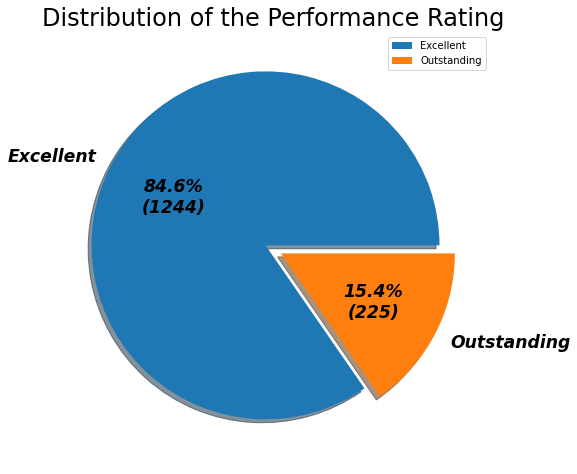

In [ ]:
performance_rating = df.PerformanceRating.value_counts().sort_index()
fig, ax = plt.subplots(figsize = (12, 8))
ax.pie(performance_rating.values, labels = ['Excellent', 'Outstanding'], explode=[0.05, 0.05], shadow = True,
       autopct = lambda pct: func(pct, performance_rating.values),
       textprops = {'family':'sans-serif', 'fontsize':'xx-large', 'fontstyle':'italic', 'fontweight':'heavy'})
plt.title('Distribution of the Performance Rating', size = 24)
plt.legend(['Excellent', 'Outstanding'])
plt.show()

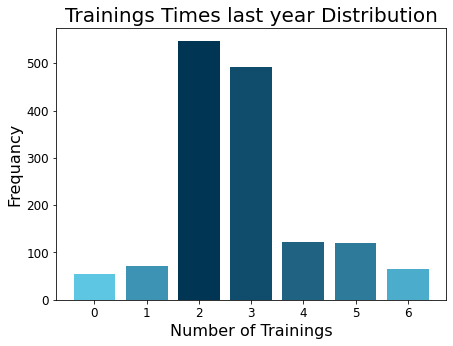

In [ ]:
cust_color = ['#5cc6e3', '#3c93b3', '#003653', '#104c6b', '#1f6282', '#2d7a9b', '#4caccb',]
trainings_last_year = df.TrainingTimesLastYear.value_counts().sort_index()
fig, ax = plt.subplots(figsize = (7, 5))
ax.bar(trainings_last_year.index, trainings_last_year.values, color = cust_color)
plt.title('Trainings Times last year Distribution', size = 20)
plt.xlabel('Number of Trainings', size = 16)
plt.ylabel('Frequancy', size = 16)
plt.locator_params('x', nbins = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

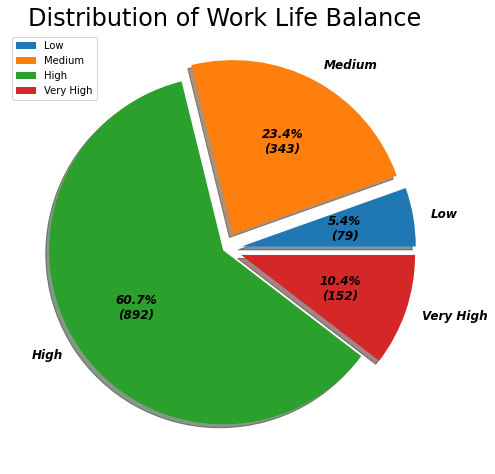

In [ ]:
work_life_balance = df.WorkLifeBalance.value_counts().sort_index()
fig, ax = plt.subplots(figsize = (12, 8))
ax.pie(work_life_balance.values, labels = ['Low', 'Medium', 'High', 'Very High'], explode=[0.1, 0.1, 0.01, 0.1],
       shadow = True, autopct = lambda pct: func(pct, work_life_balance.values),
       textprops = {'family':'sans-serif', 'fontsize':'large', 'fontstyle':'italic', 'fontweight':'heavy'})
plt.title('Distribution of Work Life Balance', size = 24)
plt.legend(['Low', 'Medium', 'High', 'Very High'])
plt.show()

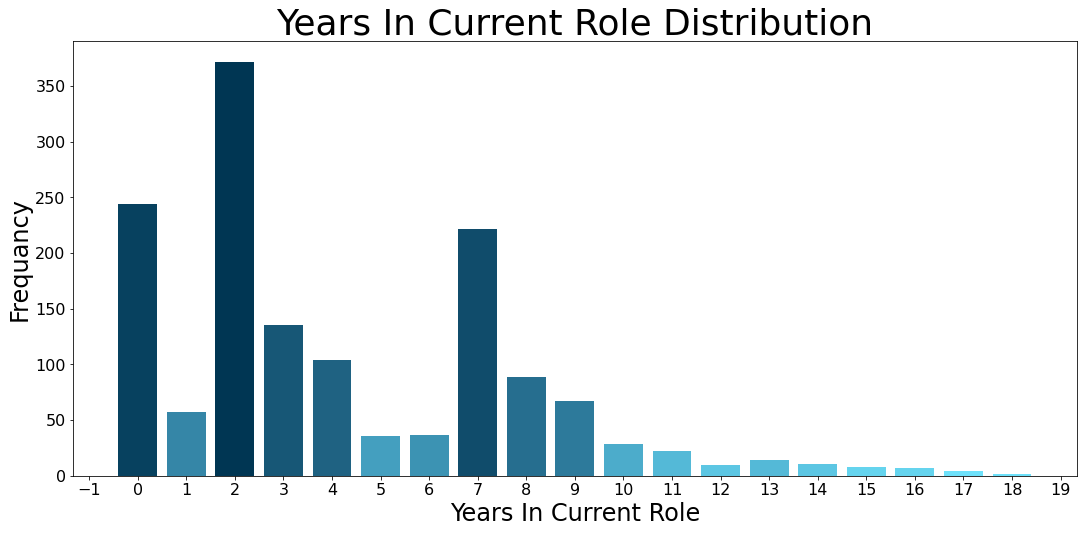

In [ ]:
cust_color = ['#07415f', '#3586a7', '#003653', '#175776', '#1f6282', '#449fbf', '#3c93b3', '#104c6b', '#266e8f', '#2d7a9b',
              '#4caccb', '#54b9d7', '#5cc6e3', '#54b9d7', '#5cc6e3', '#65d4ee', '#65d4ee', '#6ee1fa', '#6ee1fa']
years_in_current_role = df.YearsInCurrentRole.value_counts().sort_index()
fig, ax = plt.subplots(figsize = (18, 8))
ax.bar(years_in_current_role.index, years_in_current_role.values, color = cust_color)
plt.title('Years In Current Role Distribution', size = 36)
plt.xlabel('Years In Current Role', size = 24)
plt.ylabel('Frequancy', size = 24)
plt.locator_params('x', nbins = 38)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

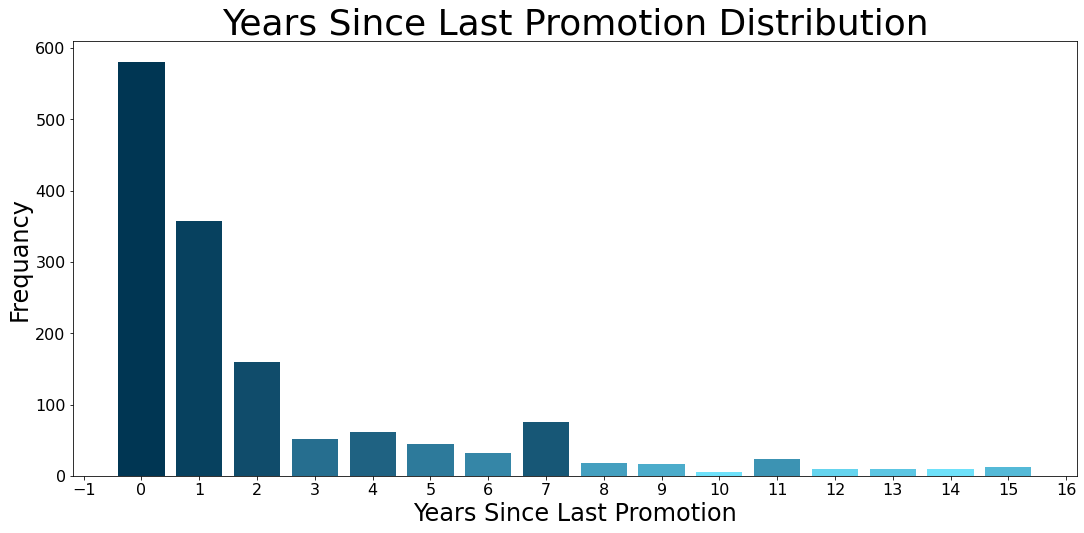

In [ ]:
cust_color = ['#003653', '#07415f', '#104c6b', '#266e8f', '#1f6282', '#2d7a9b', '#3586a7', '#175776', '#449fbf', '#4caccb',
              '#6ee1fa', '#3c93b3', '#65d4ee', '#5cc6e3', '#6ee1fa', '#54b9d7']
years_since_last_promotion = df.YearsSinceLastPromotion.value_counts().sort_index()
fig, ax = plt.subplots(figsize = (18, 8))
ax.bar(years_since_last_promotion.index, years_since_last_promotion.values, color = cust_color)
plt.title('Years Since Last Promotion Distribution', size = 36)
plt.xlabel('Years Since Last Promotion', size = 24)
plt.ylabel('Frequancy', size = 24)
plt.locator_params('x', nbins = 32)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

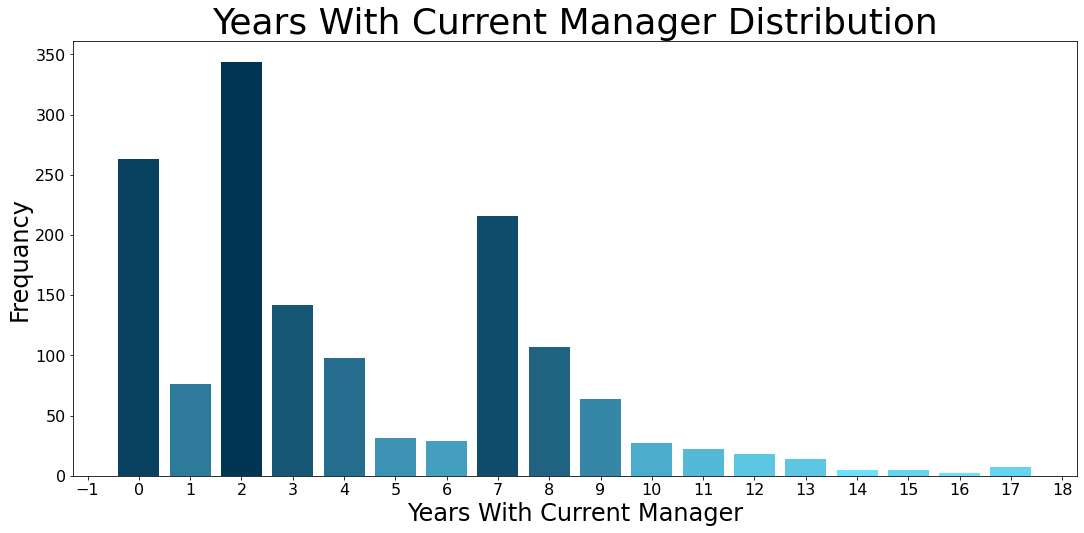

In [ ]:
cust_color = ['#07415f', '#2d7a9b', '#003653','#175776', '#266e8f', '#3c93b3', '#449fbf', '#104c6b', '#1f6282', '#3586a7',
              '#4caccb', '#54b9d7', '#5cc6e3', '#5cc6e3', '#6ee1fa', '#65d4ee', '#6ee1fa', '#65d4ee']
years_with_current_manager = df.YearsWithCurrManager.value_counts().sort_index()
fig, ax = plt.subplots(figsize = (18, 8))
ax.bar(years_with_current_manager.index, years_with_current_manager.values, color = cust_color)
plt.title('Years With Current Manager Distribution', size = 36)
plt.xlabel('Years With Current Manager', size = 24)
plt.ylabel('Frequancy', size = 24)
plt.locator_params('x', nbins = 38)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

# Q1. What's the relationship between The Age and The Monthly Income?

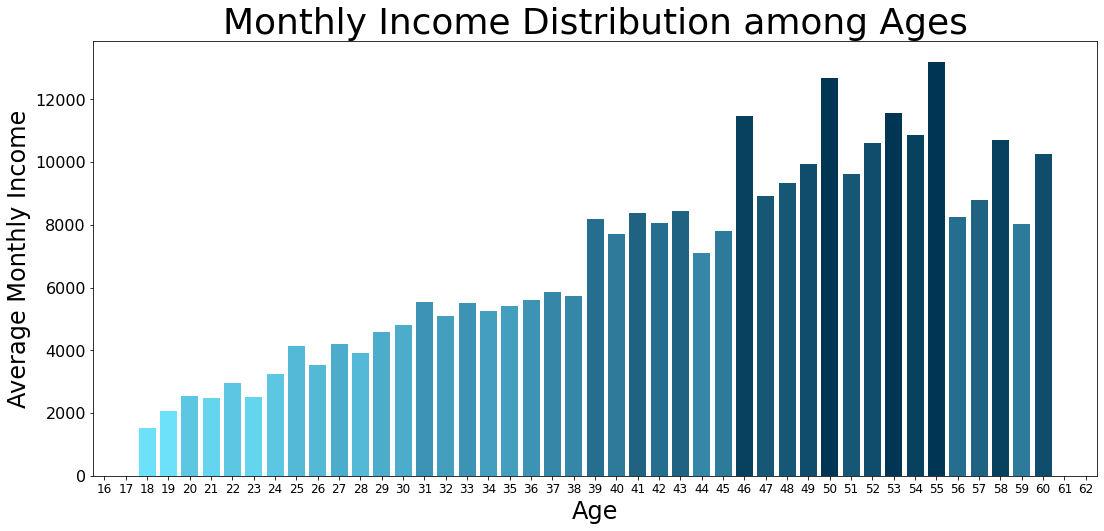

In [ ]:
cust_color = ['#6ee1fa', '#6ee1fa', '#5cc6e3', '#65d4ee', '#5cc6e3', '#65d4ee', '#5cc6e3', '#54b9d7', '#54b9d7', '#4caccb',
              '#54b9d7', '#4caccb', '#4caccb', '#3c93b3', '#449fbf', '#3c93b3', '#449fbf', '#449fbf', '#3c93b3', '#3586a7',
              '#3586a7', '#266e8f', '#2d7a9b', '#1f6282', '#266e8f', '#1f6282', '#3586a7', '#2d7a9b', '#07415f', '#175776',
              '#175776', '#104c6b', '#003653', '#175776', '#104c6b', '#003653', '#07415f', '#003653', '#266e8f', '#1f6282',
              '#07415f', '#2d7a9b', '#104c6b',]
age_monthly_income = df.groupby(['Age'])['MonthlyIncome'].mean()
fig, ax = plt.subplots(figsize = (18, 8))
ax.bar(age_monthly_income.index, age_monthly_income.values, color = cust_color)
plt.title('Monthly Income Distribution among Ages', size = 36)
plt.xlabel('Age', size = 24)
plt.ylabel('Average Monthly Income', size = 24)
plt.locator_params('x', nbins = 86)
plt.xticks(size = 12)
plt.yticks(size = 16)
plt.show()

* Here we can easily notice that the average monthly income is increasing with the increase in age, that's logical because the increase in age almost means more experience and knowledge.

# Q2. How does The Monthly Income depend on The Education Level?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  


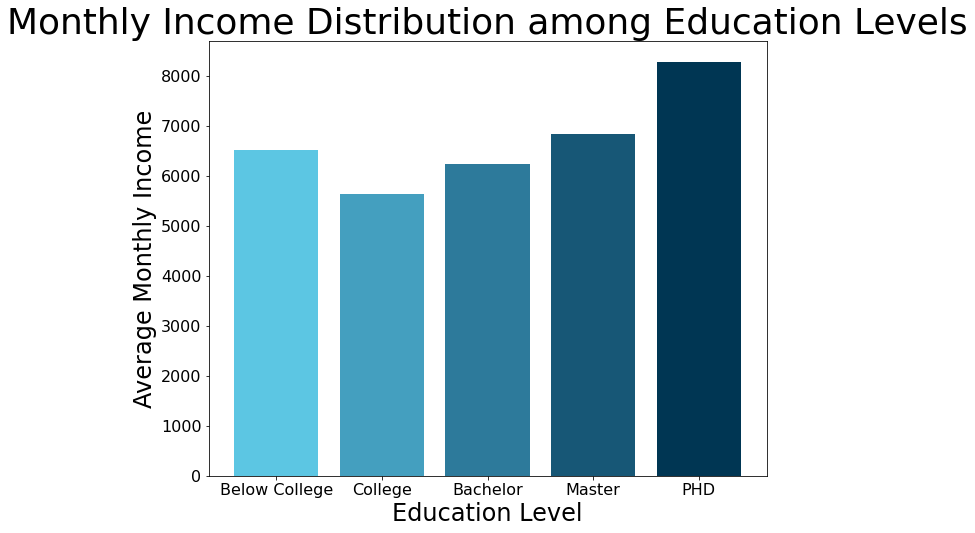

In [ ]:
cust_color = ['#5cc6e3', '#449fbf', '#2d7a9b', '#175776', '#003653',]
education_monthly_income = df.groupby(['Education'])['MonthlyIncome'].mean()
fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(['Below College', 'College', 'Bachelor', 'Master', 'PHD'], education_monthly_income.values, color = cust_color)
plt.title('Monthly Income Distribution among Education Levels', size = 36)
plt.xlabel('Education Level', size = 24)
plt.ylabel('Average Monthly Income', size = 24)
plt.locator_params('x', nbins = 10)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

* It's clear that the higher education degree someone has, the more salary he can get.

# Q3. Wich Job Role / Job Level has the highest salaries, and which one has the lowest

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  


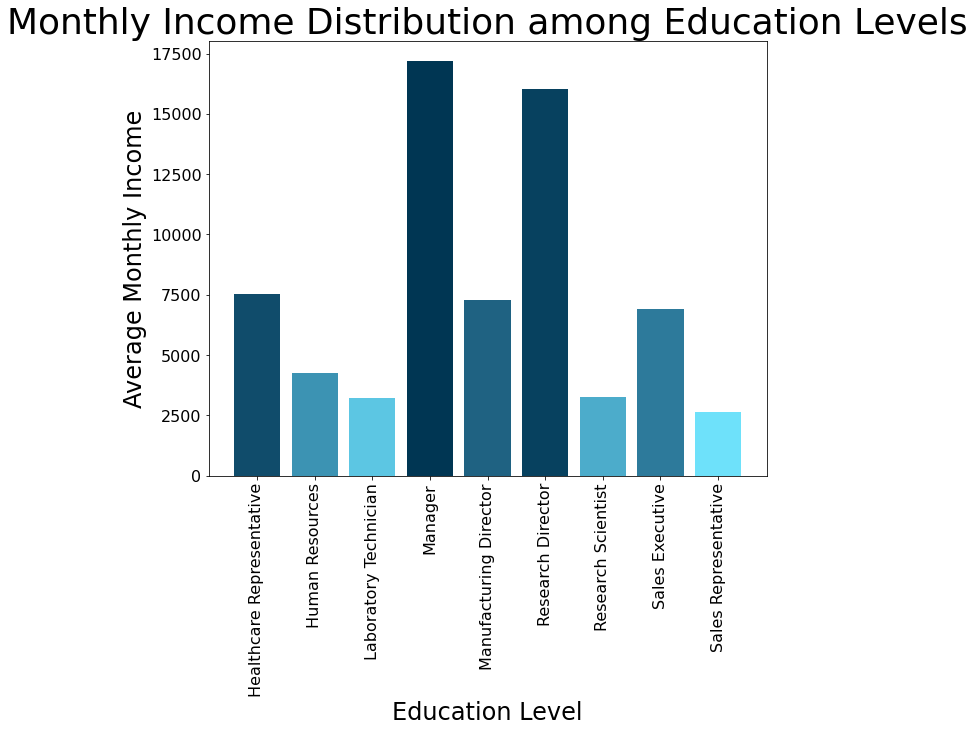

In [ ]:
cust_color = ['#104c6b', '#3c93b3', '#5cc6e3', '#003653', '#1f6282', '#07415f', '#4caccb', '#2d7a9b', '#6ee1fa',]
job_role_monthly_income = df.groupby(['JobRole'])['MonthlyIncome'].mean()
fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(job_role_monthly_income.index, job_role_monthly_income.values, color = cust_color)
plt.title('Monthly Income Distribution among Education Levels', size = 36)
plt.xlabel('Education Level', size = 24)
plt.ylabel('Average Monthly Income', size = 24)
plt.locator_params('x', nbins = 18)
plt.xticks(rotation = 90, size = 16)
plt.yticks(size = 16)
plt.show()

* We can easily see that The Manager has the highest salary and that's not a surprise.
* Here, The Sales Representative has the lowest salary, and then Laboratory Technician.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  import sys


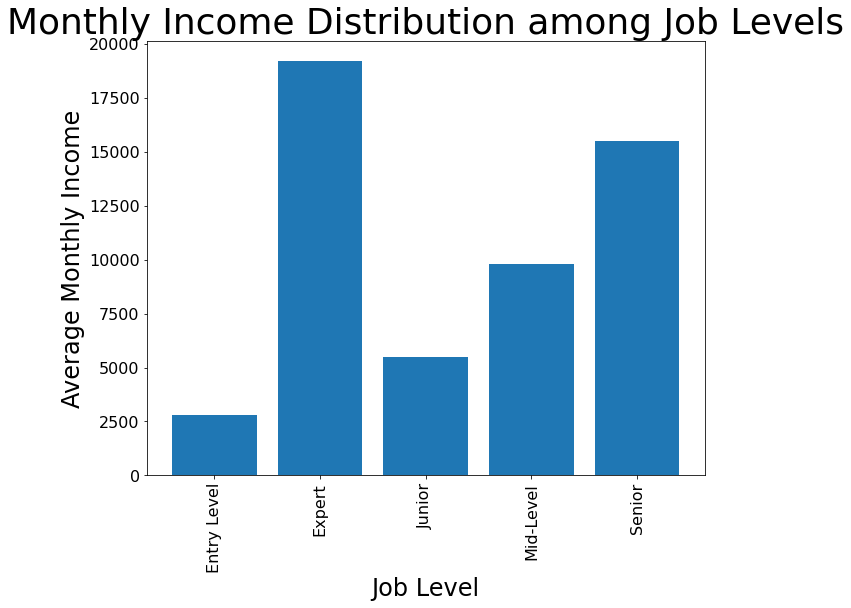

In [ ]:
job_level_monthly_income = df.groupby(['JobLevel'])['MonthlyIncome'].mean()
fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(job_level_monthly_income.index, job_level_monthly_income.values)
plt.title('Monthly Income Distribution among Job Levels', size = 36)
plt.xlabel('Job Level', size = 24)
plt.ylabel('Average Monthly Income', size = 24)
plt.locator_params('x', nbins = 18)
plt.xticks(rotation = 90, size = 16)
plt.yticks(size = 16)
plt.show()

* The higher Job Level, The more salary the employee get.

# Q4. Is The Years At Company related to Number of Companies someone has worked for?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  


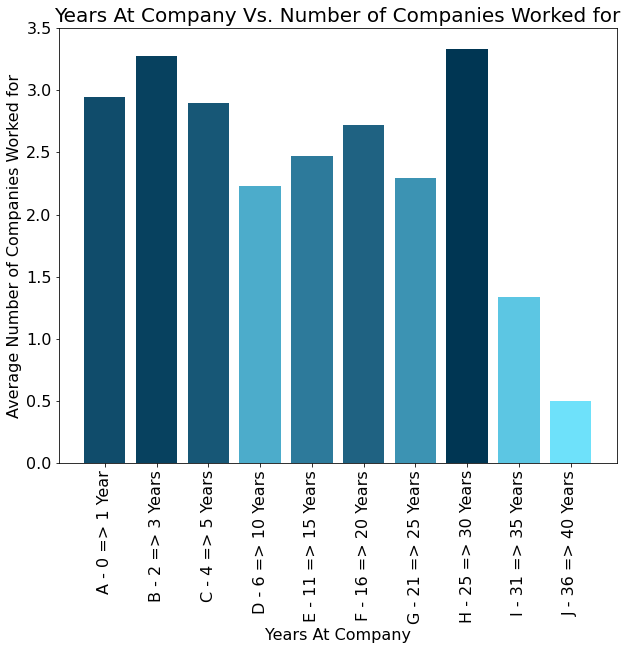

In [ ]:
cust_color = ['#104c6b', '#07415f', '#175776', '#4caccb', '#2d7a9b', '#1f6282', '#3c93b3', '#003653', '#5cc6e3', '#6ee1fa']
years_at_company_number_of_companies = df.groupby(['YearsAtCompanyGroups'])['NumCompaniesWorked'].mean()
fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(years_at_company_number_of_companies.index, years_at_company_number_of_companies.values, color = cust_color)
plt.title('Years At Company Vs. Number of Companies Worked for', size = 20)
plt.xlabel('Years At Company', size = 16)
plt.ylabel('Average Number of Companies Worked for', size = 16)
plt.locator_params('x', nbins = 20)
plt.xticks(rotation = 90, size = 16)
plt.yticks(size = 16)
plt.show()

* By looking at Group 10 who have been at the company for 36 to 40 years, we can notice that the average number of companies they worked for before is almost 0.5 which simply means that these people in Group 10 even worked in only 1 company before or never worked for any other company. That's logical because I think 40 years of work is above the world's average and if anyone has already spent 40 years in this company, it's supposed that it's the only job in his life.

* Looking at Groups 1, 2, and 3 for example, we'll find that everyone in these groups has worked in almost 3 companies before, and is being at this company for 0 to 5 years only.

* generaly, I think there's a inverse relationship between The Years At Company and The Number of Companies someone has worked for before.

# Q5. May The more Work Life Balance be related to Monthly Income?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  


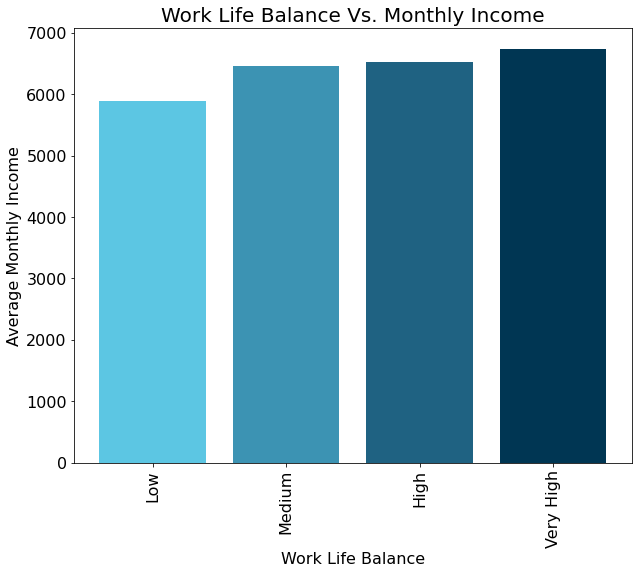

In [ ]:
cust_color = ['#5cc6e3', '#3c93b3', '#1f6282', '#003653']
work_life_balance_monthly_income = df.groupby(['WorkLifeBalance'])['MonthlyIncome'].mean()
fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(['Low', 'Medium', 'High', 'Very High'], work_life_balance_monthly_income.values, color = cust_color)
plt.title('Work Life Balance Vs. Monthly Income', size = 20)
plt.xlabel('Work Life Balance', size = 16)
plt.ylabel('Average Monthly Income', size = 16)
plt.locator_params('x', nbins = 8)
plt.xticks(rotation = 90, size = 16)
plt.yticks(size = 16)
plt.show()

* It's clear that persons with higher salaries have more Work-Life Balance Levels.
* Even if the difference in the salary isn't much, it's a monthly difference and that means it matters with time.

# Q6. Is there a relationship between The Percentage of Salary Hike and The Performance Rating?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  import sys


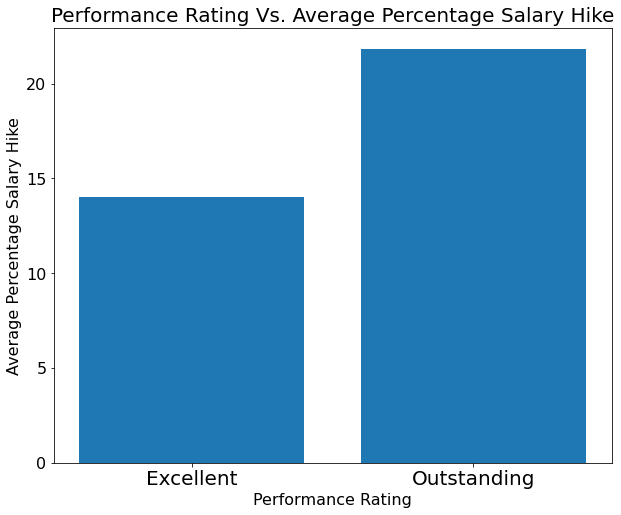

In [ ]:
performance_rating_percentage_salary_hike = df.groupby(['PerformanceRating'])['PercentSalaryHike'].mean()
fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(['Excellent', 'Outstanding'], performance_rating_percentage_salary_hike.values)
plt.title('Performance Rating Vs. Average Percentage Salary Hike', size = 20)
plt.xlabel('Performance Rating', size = 16)
plt.ylabel('Average Percentage Salary Hike', size = 16)
plt.locator_params('x', nbins = 2)
plt.xticks(size = 20)
plt.yticks(size = 16)
plt.show()

* It's clear that people with Excellent Performance almost got a 14% increase in salary, while people with Outstanding Performance almost have a 22% increase in salary.

# Q7. How is The Marital Status is related with The Age?

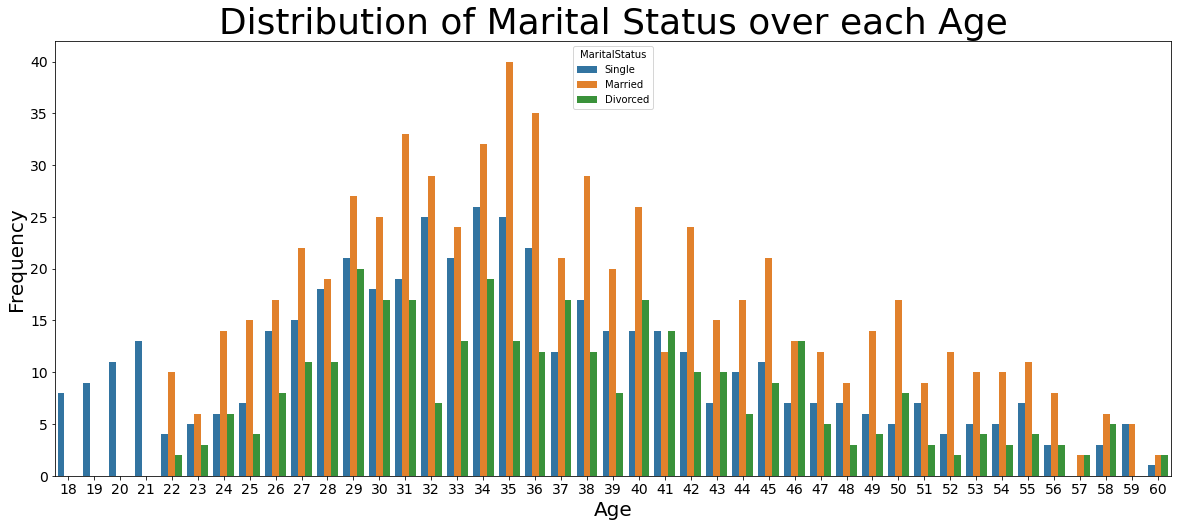

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(data = df, x = 'Age', hue = 'MaritalStatus')
plt.title('Distribution of Marital Status over each Age', size = 36)
plt.xlabel("Age", size = 20)
plt.ylabel("Frequency", size = 20)
plt.xticks(size = 14);
plt.yticks(size = 14);

* From 18 to 21 years old, we can only find that persons are single.
* Starting from the age of 22 we'll notice that number of married people is increasing, the number of divorced people also started to appear.
* From the age of 29 to 60, the number of divorced is increasing and at some ages, it exceeded the number of singles.

# Q8. What's the relationship between The Age and The Department?

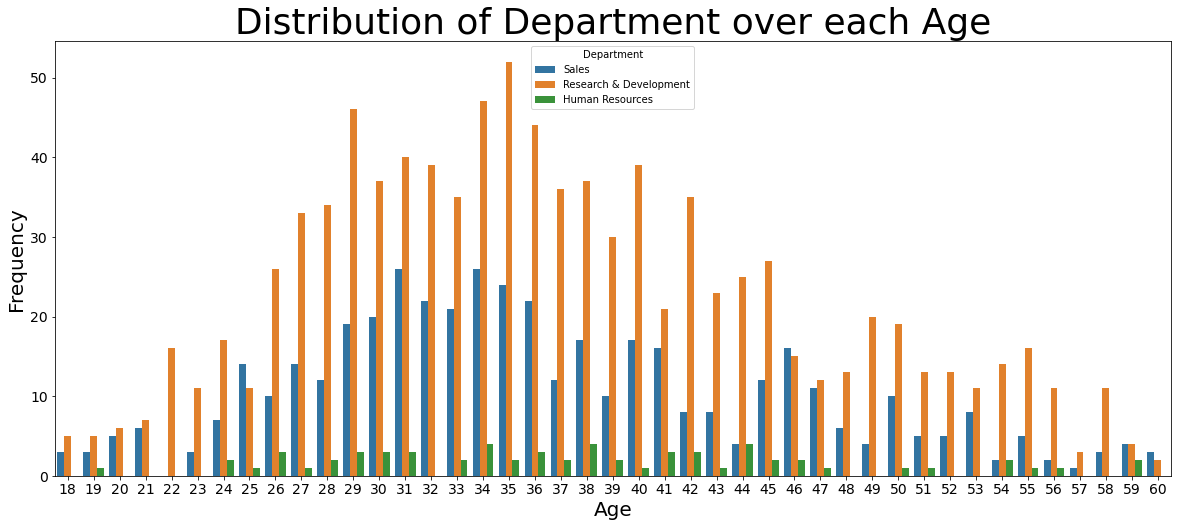

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(data = df, x = 'Age', hue = 'Department')
plt.title('Distribution of Department over each Age', size = 36)
plt.xlabel("Age", size = 20)
plt.ylabel("Frequency", size = 20)
plt.xticks(size = 14);
plt.yticks(size = 14);

* From the age of 18 to 22, It's rare to be in The Human Resource Department based on this plot.
* It's also rare to be in The Human Resource Department if you're above 47 years old.

# Q9. Is there a relationship between The Education Level and The Age?

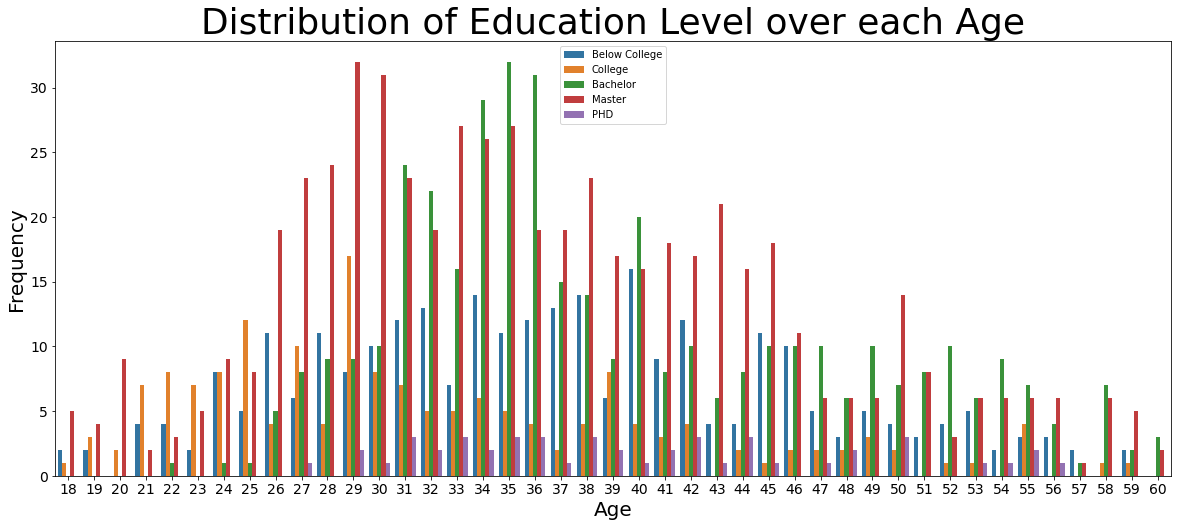

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(data = df, x = 'Age', hue = 'Education')
plt.title('Distribution of Education Level over each Age', size = 36)
plt.xlabel("Age", size = 20)
plt.ylabel("Frequency", size = 20)
plt.xticks(size = 14);
plt.yticks(size = 14);
plt.legend(labels = ['Below College', 'College', 'Bachelor', 'Master', 'PHD']);

* We can clearly see that no one below the age of 22 has a Master's degree.
* It's rare to have a Master's degree if your age is between 22 and 25.
* No one has a Ph.D. before the age of 27
* The range of ages between 31 to 40 is the perfect age for a Master's degree

# Q10. What's the most required Education Field for every Job Role?

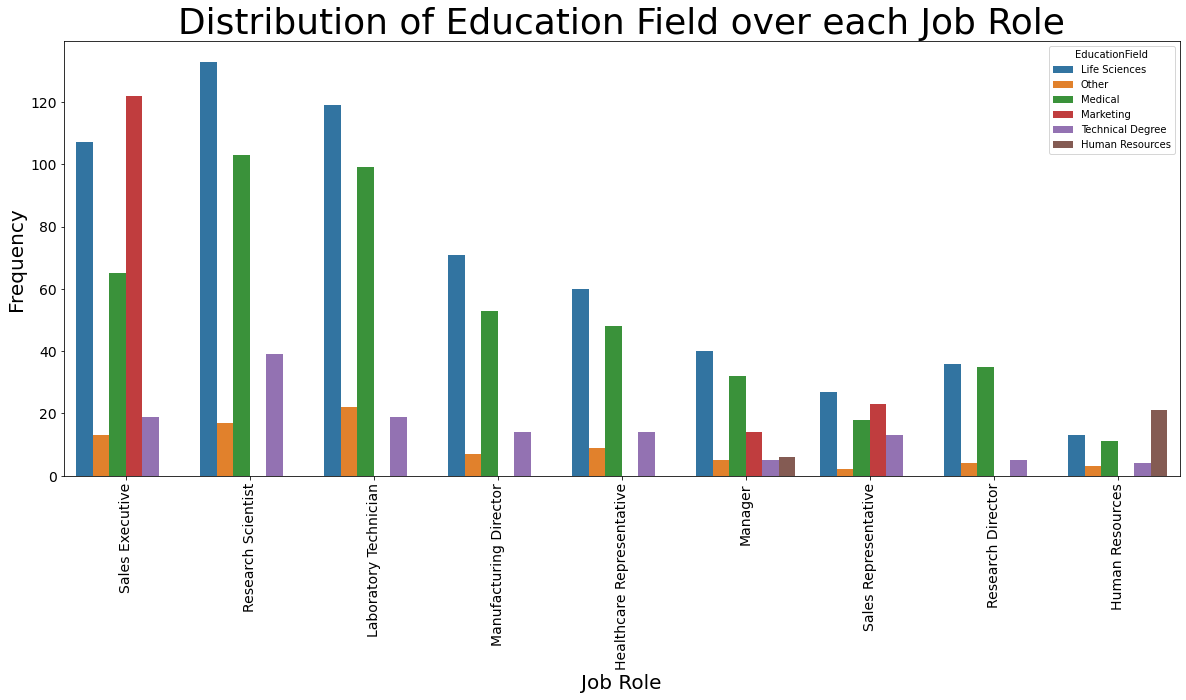

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(data = df, x = 'JobRole', hue = 'EducationField')
plt.title('Distribution of Education Field over each Job Role', size = 36)
plt.xlabel("Job Role", size = 20)
plt.ylabel("Frequency", size = 20)
plt.xticks(rotation = 90, size = 14);
plt.yticks(size = 14);

* For Research Scientist and Research Director Roles, The most required Fields are Life Sciences and Medical. Marketing and Human Resources aren't required here.
* For Sales Executive Role, The Field of Marketing is the most required.
* For Human Resources Role, Human Resources Field is the most required.